In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
class Perc ():
    def __init__(self,entrada,f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5]):
        self.entrada = entrada
        self.entradas,self.saidas,self.maior,self.menor = self.conv_inp_out(entrada)
        self.total_entradas = len(self.entradas)
        self.x = f
        self.w0 = w0
        self.apz = apz
        self.pesos = []
        self.p0 = []
        self.vetori = vetori
        self.n_epc = 0
        self.n_ajust = 0
        
    
    def conv_inp_out (self,entrada):
        dado = 'data/data/'+str(entrada)
        data = np.fromfile(str(dado))
        N = 3
        saidas_a=[]
        d_data = [data[n:n+N].tolist() for n in range(0, len(data), N)]
        for i in d_data:
            saidas_a.append(i[-1])
            i.pop()
        entradas_a = d_data
        maior = 0
        menor = 100000000
        for i in entradas_a:
            for j in range(len(i)):
                if maior<i[j]:
                    maior=i[j]
                if menor>i[j]:
                    menor=i[j]
    
        return (entradas_a,saidas_a,maior,menor)
    
    def treino(self):
        
        p1 = self.vetori[0]
        p2 = self.vetori[1]
        for i in range(3):
            r = rd.uniform(p1,p2)
            self.p0.append(r)
        w0  = np.array(self.w0)


        #print('Vetor de pesos Iniciais:',self.p0)

        for entrada in self.entradas:
            entrada.insert(0, -1)
        self.entradas = np.array(self.entradas)
        
        
        epcs = 0
        ajustes = 0
        while True:
            ajus_epc=0
            erro = False

            for i in range(self.total_entradas): 

                u = 0
                u = u + (np.vdot(self.entradas[i],self.p0))
                y = self.activate(u)

                if self.saidas[i]-y!=0.0:
                    erro_aux = self.saidas[i]-y
                    self.p0 = self.p0+(self.apz*erro_aux*(self.entradas[i]))
                    ajustes += 1
                    ajus_epc+=1
                    #print(p0)
                    self.pesos.append(self.p0)
                    erro = True
                    #print('Época ',epcs,': ',ajus_epc,' ajustes.')
            epcs+=1
            if not erro:
                break
        
        #print('a) Alterações no vetor de Pesos:',ajustes)
        self.n_ajust = ajustes
        #print('Ultimo Vetor de Pesos: ',self.p0)
        #print('-----------------------------------------------------------\n')
        #print("b) Números de épocas até a convergência:",epcs)
        self.n_epc+=epcs
        #print('-----------------------------------------------------------\n')
        
        
    def activate(self,u):
        if u>0:
            return 1.0
        else:
            return 0.0
        
    def n_conv(self,):
        #num_epc = int(self.n_epc)
        return n_epc
    
    def n_ajus(self):
        num_ajust = self.n_ajust
        return num_ajust
        
    def plotsI(self): #Função para plotar gráfico com pontos (x,y) mais dispersos
        plot_x_1 = []
        plot_y_1 = []
        plot_x_0 = []
        plot_y_0 = []

        plt.figure(figsize=(8,5))

        for i in range (0,self.total_entradas):
            if self.saidas[i]==1.0:
                plot_x_1.append(self.entradas[i][1])
                plot_y_1.append(self.entradas[i][2])
            else:
                plot_x_0.append(self.entradas[i][1])
                plot_y_0.append(self.entradas[i][2])

        x = plot_x_1
        y = plot_y_1
        a = plot_x_0
        b = plot_y_0

        plt.scatter(x,y,s=3,alpha=1,label = 'Classe 1')
        plt.scatter(a,b,s=3,alpha=1, c='red', label= 'Classe 0')
        plt.legend()
        #plt.plot(x,y,'o')
        #plt.plot(a,b,'o')
        #reta = [(self.p0[0]/self.p0[2]),-(self.p0[1]/self.p0[2])]
        #plt.plot(reta)
        aaaa=[]
        bbbb = []
        for i in range(int(self.menor),int(self.maior)):
            aaaa.append(i)
            bbbb.append((self.p0[0]/self.p0[2])-(self.p0[1]/self.p0[2])*i)

        plt.scatter(aaaa,bbbb,s=0.1,alpha=0.5, c='black')

        print('Gráfico gerado')

        plt.show() 
        
    def plotsII(self): #Função para plotar gráfico com pontos (x,y) não muito dispersos
        plot_x_1 = []
        plot_y_1 = []
        plot_x_0 = []
        plot_y_0 = []

        plt.figure(figsize=(8,5))

        for i in range (0,self.total_entradas):
            if self.saidas[i]==1.0:
                plot_x_1.append(self.entradas[i][1])
                plot_y_1.append(self.entradas[i][2])
            else:
                plot_x_0.append(self.entradas[i][1])
                plot_y_0.append(self.entradas[i][2])

        x = plot_x_1
        y = plot_y_1
        a = plot_x_0
        b = plot_y_0

        plt.scatter(x,y,s=3,alpha=1,label = 'Classe 1')
        plt.scatter(a,b,s=3,alpha=1, c='red', label= 'Classe 0')
        plt.legend()
        #plt.plot(x,y,'o')
        #plt.plot(a,b,'o')
        #reta = [(self.p0[0]/self.p0[2]),-(self.p0[1]/self.p0[2])]
        #plt.plot(reta)
        aaaa=[]
        bbbb = []
        for i in range(-7,7):
            aaaa.append(i)
            bbbb.append((self.p0[0]/self.p0[2])-(self.p0[1]/self.p0[2])*i)

        #plt.scatter(aaaa,bbbb,s=0.1,alpha=0.5, c='black')
        plt.plot(aaaa,bbbb)
        print('Gráfico gerado')

        plt.show() 
    

## Parte I - Resolvendo um Problema Linearmente Separável

In [3]:
rede = Perc(entrada='dataAll.txt',f=0,w0=-1,apz=0.1,vetori=[-0.5,0.5])

In [4]:
rede.treino()
print('a) Número Total de Ajustes no Vetor de Pesos: ', rede.n_ajust)
print('b) Número de Épocas: ',rede.n_epc)

a) Número Total de Ajustes no Vetor de Pesos:  59
b) Número de Épocas:  3


Gráfico gerado


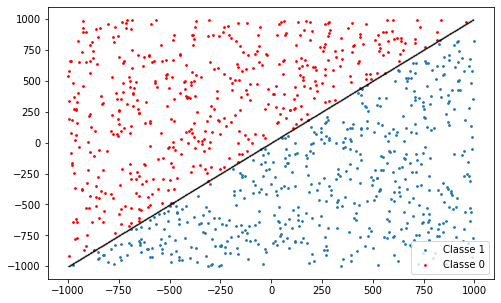

In [5]:
rede.plotsI()

Configuração:
 Taxa de Aprendizado:  0.4 Intervalo de Pesos:  [-100, 100]
Gráfico gerado


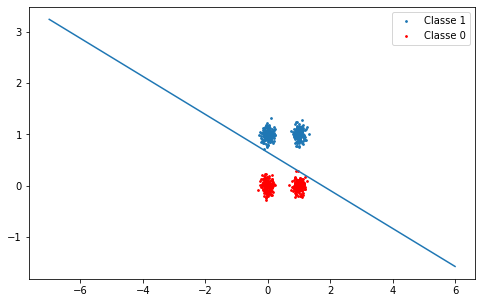

Configuração:
 Taxa de Aprendizado:  0.4 Intervalo de Pesos:  [-0.5, 0.5]
Gráfico gerado


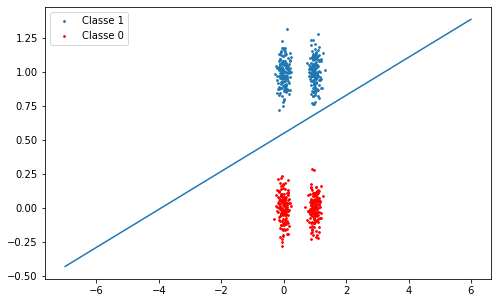

Configuração:
 Taxa de Aprendizado:  0.1 Intervalo de Pesos:  [-100, 100]
Gráfico gerado


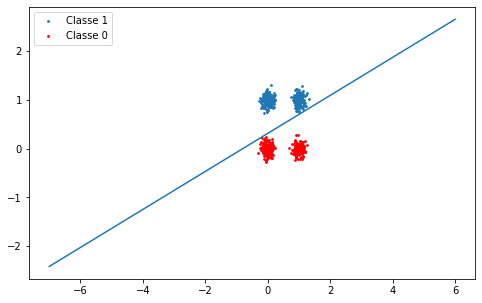

Configuração:
 Taxa de Aprendizado:  0.1 Intervalo de Pesos:  [-0.5, 0.5]
Gráfico gerado


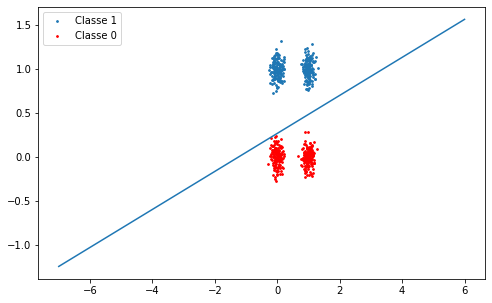

Configuração:
 Taxa de Aprendizado:  0.01 Intervalo de Pesos:  [-100, 100]
Gráfico gerado


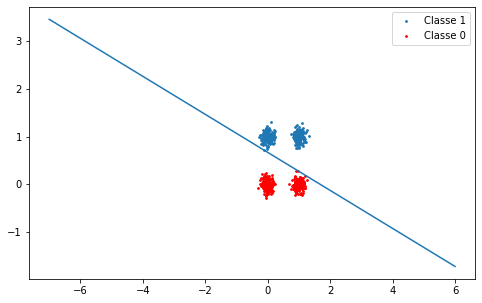

Configuração:
 Taxa de Aprendizado:  0.01 Intervalo de Pesos:  [-0.5, 0.5]
Gráfico gerado


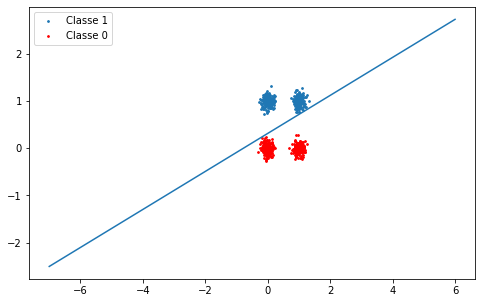

+---------------------+--------------------+-------------------+---------------------------+------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Media dos Ajustes | Desvio Padrão dos Ajustes | Menor número de épocas |
+---------------------+--------------------+-------------------+---------------------------+------------------------+
|         0.4         |    [-100, 100]     |       307.0       |     168.19215201667407    |           5            |
|         0.4         |    [-0.5, 0.5]     |        6.8        |     3.1874754901018454    |           2            |
|         0.1         |    [-100, 100]     |       1122.2      |     733.5019836373996     |           9            |
|         0.1         |    [-0.5, 0.5]     |        10.1       |     5.990826320300064     |           2            |
|         0.01        |    [-100, 100]     |      12380.3      |     6486.521503086226     |           37           |
|         0.01        |    [-0.5, 0.5]     |        54.4

In [6]:
entrada_txt = 'data0.txt'
tx_aprendizados = [0.4,0.1,0.01]
vrandoms = [[-100,100],[-0.5,0.5]]
pt = PrettyTable()
pt.align = "c"
pt.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Media dos Ajustes", "Desvio Padrão dos Ajustes",
                  'Menor número de épocas']
for  tx in tx_aprendizados:
    for v_random in vrandoms:
        ajustes_t = []
        epcs_t = []
        media_ajustes =0
        #print('Taxa de aprendizado: ',tx)
        #print('Intervalo de Pesos: ',v_random)
        for i in range(10):
            
            rede1 = Perc(entrada=entrada_txt,f=0,w0=-1,apz=tx,vetori=v_random)
            rede1.treino()
            
            k = rede1.n_ajust
            m = rede1.n_epc
            ajustes_t.append(k)
            epcs_t.append(m)
        
        print("Configuração:\n Taxa de Aprendizado: ",tx,"Intervalo de Pesos: ",v_random)
        rede1.plotsII()          
        
        pt.add_row([tx, v_random, np.mean(ajustes_t), np.std(ajustes_t),min(epcs_t)])

        
print(pt)

    -- Como podemos verificar na tabela, Realizar a aprendizagem com Intervalos altos (-100,+100 - no exemplo), resulta em maior número de Ajustes, mas nem sempre reflete na quantidade de números de épocas.
    -- O pior caso realizado, e presente na tabela, é no caso onde há uma taxa de aprendizado baixa (0.01) e um Intervalo de pesos alta (-100,+100), com as maiores médias e desvios padrões.
    -- Utilizando intervalo de pesos menores (-0.5,+0.5), podemos verificar resultados melhores. Nos testes, utilizando este intervalo com as taxas T1= 0.1 e T2= 0.4, não podemos citar que um se sobressai melhor que outro, pois houve testes onde as Médias,DP e Épocas de T1 foram melhores que T2, mas também ocorreu o inverso em outra iteração.
    -- Utilizando um intervalo de pesos relativamente baixo (-0.5,+0.5) com uma Taxa de Aprendizado baixa (0.01), podemos verificar um aumento na quantidade de Ajustes, que se comparado, com taxas de aprendizado maiores (0.1 e 0.4), com o mesmo intervalo de pesos, são elevados.

# 2.3. Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [2]:
import numpy as np
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt



#Inserindo dados em um vetor e separando os dados de treino e teste.
df = np.fromfile('dataHoldout.txt')
df = np.split(df, len(df)/3)
df = np.array(df)
   

# Classe Perceptron - Treinamento - V.2

In [3]:
class Perceptron(object):
    #Construtor da Classe,
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
    
    #Essa função irá separar os rótulos do vetor de entradas    
    def organiza(self, arr):
        valor = []
        labels = []
        for i  in arr:
            valor.append(i[0:2])
            labels.append(i[2])
        return valor, labels
           
    def predict(self, inputs):
        #A função dot é produto de dois arrays, o valor deste produto será somado pelos pesos
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1.0
        else:
          activation = 0.0            
        return activation

    def train(self, data):
        for _ in range(self.threshold):
            #A cada iteração faz um embaralhamento do array
            np.random.shuffle(data)
            training_inputs, labels = self.organiza(data)
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                
    



## Apresentar um gráfico inicial que evidencie que este problema não é linearmente separável.

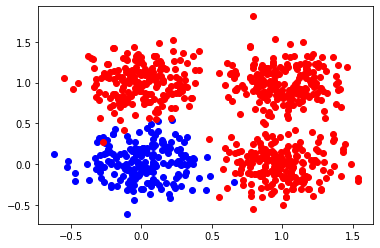

In [4]:
perceptron = Perceptron(2)
(X,Y) = perceptron.organiza(df)
cont = 0
for i in X:
    plt.plot(i[0],i[1],'bo' if (Y[cont] == 1.0) else 'ro')
    cont = cont + 1

## Dividindo em treino (70%) e teste (30%) aleatoriamente


In [29]:
np.random.shuffle(df)
total_dataset = len(df)
training, test = df[:int((total_dataset*70)/100),:], df[int((total_dataset*70)/100):,:]

In [30]:
#Treinando os 70% do dataset
perceptron.train(training)

# Aferindo a classe test

In [31]:
#Aqui organizamos os valores em dois arrays: inputs e valores_reais do conjunto de teste
inputs, valores_reais = perceptron.organiza(test)
#Saída esperada
print(valores_reais)

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [32]:
valores_preditos = []
for i in inputs:
    valores_preditos.append(perceptron.predict(i))
#Saídas preditas pelo modelo
print (valores_preditos)

[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

# 2.3.1 Matriz de confusão

In [33]:
print(confusion_matrix(valores_reais,valores_preditos))

[[180   3]
 [  5  52]]


# 2.3.2.1 Acurácia

In [34]:
print(accuracy_score(valores_reais,valores_preditos))

0.9666666666666667


# 2.3.2.2 Precisão

In [35]:
print(precision_score(valores_reais,valores_preditos))

0.9454545454545454


# 2.3.2.3 Revocação

In [36]:
print(recall_score(valores_reais,valores_preditos))

0.9122807017543859


# 2.3.2.4 F-score

In [37]:
print(f1_score(valores_reais,valores_preditos))

0.9285714285714285


# 2.3.4 A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes 

Olhando os valores dos calculos do despenho do nosso modelo, acreditamos que a qualidade foi boa. De um modo geral o neurônio em questão foi bem assertivo, como podemos constatar olhando as métricas superiores a 85%.

## Usando os dados de TESTE

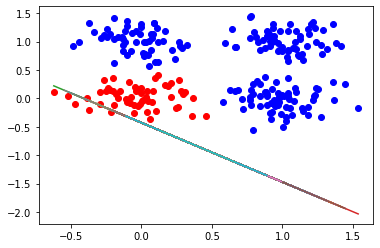

In [39]:
(X_training, Y_training) = perceptron.organiza(test) 
#perceptron.train(training)
cont = 0
for i in X_training:
    plt.plot(i[0],i[1],'ro' if (Y_training[cont] == 1.0) else 'bo')
    cont = cont + 1
for i in range(len(X_training)):#np.linspace(np.amin(X),np.amax(X)):
    x = X_training[i]
    yi = (perceptron.weights[0]/perceptron.weights[2]) - (perceptron.weights[1]/perceptron.weights[2]) * x
    plt.plot(x,yi)

## Usando os dados de Treino

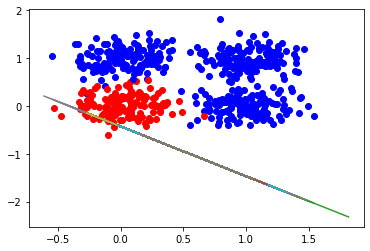

In [40]:
(X_training, Y_training) = perceptron.organiza(training) 
#perceptron.train(training)
cont = 0
for i in X_training:
    plt.plot(i[0],i[1],'ro' if (Y_training[cont] == 1.0) else 'bo')
    cont = cont + 1
for i in range(len(X_training)):#np.linspace(np.amin(X),np.amax(X)):
    x = X_training[i]
    yi = (perceptron.weights[0]/perceptron.weights[2]) - (perceptron.weights[1]/perceptron.weights[2]) * x
    plt.plot(x,yi)